<style>
html, body, p{
    text-align: justify !important;
    text-justify: inter-word !important;
    font-size:22px !important;
}

.centrado{
    display:flex;
    align-items:center;
    justify-content:center;
    flex-direction:column;
    font-size:30px;
}
</style>

<div class="centrado"><img src="https://estadisticaccbas.uaa.mx/pluginfile.php/2/course/section/1/LOGOBENEMERITA_CIRCULAR.png?time=1606497553373" style="max-width: 508px;"></div>

<div class="centrado">

<b>Alumnos</b>

<p>Gabriel Melchor Campos  243455</p>
<p>Carlos Fernando Nájera Ruiz 243950</p>
<p>Alejandro Robledo Rangel 244560</p>
<p>Vélez Durán Enrique 279600</p>

8 - A

Ingeniería en Computación Inteligente

Centro de Ciencias Básicas

<b>Proyecto</b>

Proyecto 2do Parcial

28 de Abril del 2024
</div>

## Bibliotecas

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Función para rotación 2D `rotacion_2D`
### Rota un punto alrededor de un centro dado en nuestro plano XY, tomará las coordenadas del punto, el ángulo de rotación al igual que su centro, devolverá las nuevas coordenadas del punto después de aplicar dicha rotación. Utiliza formulas trigonométricas para calcular las nuevas coordendas basadas en ángulo de rotación y su centro. 

In [56]:
def rotacion_2D(punto, angulo, centro):
    x, y = punto
    cx, cy = centro
    angulo_rad = np.radians(angulo)
    x_rotacion = cx + np.cos(angulo_rad) * (x - cx) - np.sin(angulo_rad) * (y - cy)
    y_rotacion = cy + np.sin(angulo_rad) * (x - cx) + np.cos(angulo_rad) * (y - cy)
    return x_rotacion, y_rotacion

## Función para impresión rotación 2D `plot_figura_2D`
### Grafica los dos puntos del plano 2D: la figura original junto con su nueva rotacón

In [57]:
def plot_figura_2D(puntos, puntos_transformados, centro, transformacion):
    plt.figure()
    plt.plot([p[0] for p in puntos], [p[1] for p in puntos], label='Original')
    plt.plot([p[0] for p in puntos_transformados], [p[1] for p in puntos_transformados], label=transformacion)
    plt.plot(centro[0], centro[1], 'ro', label='Centro de Transformacion', color="purple")  
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D - ' + transformacion)
    plt.legend()
    plt.axis('equal')
    plt.show()

## Función para rotación 3D `rotacion_3D`
### Rota un punto en un espacio tridimensional alrededor de un centro dado. Toma las coordenadas del punto, el ángulo de rotación y el centro de la rotación. Devuelve las nuevas coordenadas del punto después de aplicar la rotación. Utiliza una matriz de rotación tridimensional basada en el ángulo de rotación y el centro de rotación para calcular las nuevas coordenadas.

In [58]:
def rotacion_3D(punto, angulo, centro):
    x, y, z = punto
    cx, cy, cz = centro
    angulo_rad = np.radians(angulo)
    rotacion_matriz = np.array([[np.cos(angulo_rad), -np.sin(angulo_rad), 0],
                                [np.sin(angulo_rad), np.cos(angulo_rad), 0],
                                [0, 0, 1]])
    rotacion_punto = np.dot(rotacion_matriz, np.array([x - cx, y - cy, z - cz])) + np.array([cx, cy, cz])
    return rotacion_punto

## Función para impresión rotación 3D `plot_figura_3D`
### Grafica los dos puntos del plano 3D: la figura original junto con su nueva rotacón

In [59]:
def plot_figura_3D(puntos, puntos_rotados, centro, transformacion):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot([p[0] for p in puntos], [p[1] for p in puntos], [p[2] for p in puntos], label='Original', color='blue')
    ax.plot([p[0] for p in puntos_rotados], [p[1] for p in puntos_rotados], [p[2] for p in puntos_rotados], label=transformacion, color='red')
    ax.scatter(centro[0], centro[1], centro[2], label='Centro de Transformacion', color='yellow')
    for i in range(0, len(puntos)//2):
        if puntos[i] != (-1, 4, 0) and puntos[i+len(puntos)//2] != (-1, 2, 0.5):
            ax.plot([puntos[i][0], puntos[i+len(puntos)//2][0]], 
                    [puntos[i][1], puntos[i+len(puntos)//2][1]], 
                    [puntos[i][2], puntos[i+len(puntos)//2][2]], color='blue')
            ax.plot([puntos_rotados[i][0], puntos_rotados[i+len(puntos)//2][0]], 
                    [puntos_rotados[i][1], puntos_rotados[i+len(puntos)//2][1]], 
                    [puntos_rotados[i][2], puntos_rotados[i+len(puntos)//2][2]], color='red')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(transformacion + ' 3D')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), shadow=True, ncol=2)
    plt.show()

## Función para espejo en 2D `espejo_2D`
### Toma una lista de puntos en el plano 2D y devuelve una nueva lsita donde cada punto ha sido reflejado sobre el eje X, invirtiendo solo su coordenada Y

In [60]:
def espejo_2D(puntos):
    puntos_espejo = []
    puntos_espejoX = []
    for punto in puntos:
        # puntos_espejo.append((punto[0], -punto[1]))
        puntos_espejoX.append((-punto[0], punto[1]))
    return puntos_espejo, puntos_espejoX

## Función para espejo en 3D `espejo_3D`
### Toma una lsita de puntos en el espacio tridimensional y devuelve una nueva lsita donde cada punto ha sido reflejado sobre el plano XY, invirtiendo solo su coordenada Z.

In [61]:
def espejo_3D(puntos):
    puntos_espejo = []
    for punto in puntos:
        puntos_espejo.append((punto[0], punto[1], -punto[2]))
    return puntos_espejo

## La función `trasladar_puntos`
### Funciona tanto como para 2D como para 3D. Toma una lista de puntos y los desplaza en el espacio. Si los puntos son 2D, se desplazan en el plano XY agregando las coordenadas `tx` y `ty`. Si son puntos en 3D, se desplazan en el espacio tridimensional agregando las coordenadas `tx`, `ty`, y opcionalmente `tz`. Si los puntos no son ni 2D ni 3D, la función genera un error.


In [62]:
def trasladar_puntos(puntos, tx, ty, tz=0):
    if len(puntos[0]) == 2:  # Si los puntos son 2D
        puntos_traslados = [(p[0] + tx, p[1] + ty) for p in puntos]
    elif len(puntos[0]) == 3:  # Si los puntos son 3D
        puntos_traslados = [(p[0] + tx, p[1] + ty, p[2] + tz) for p in puntos]
    else:
        raise ValueError("Los puntos deben ser 2D o 3D.")
    return puntos_traslados

## Despliegue del menu

## En caso de elegir 1, accederemos a 2D

## Nos mostrará el menu de que tipo de transfomación elegiremos
### Para traslación es el número 1. Después de esto nos preguntará que tanto queremos trasladarlo de X y de Y.
### Después está ingresada la figura para facilitar la ejecución de nuestro código.
### Ya solamente llamamos nuestra función correspondiente
### Para rotación es el número 2. Ingresamos el angulo de rotación que queremos que tenga nuestra nueva figura. También tenemos una figura ya iniciada, para evitar repetir esto. Todas nuestras opciones tienen ya una figura definiada tanto como para 2D como para 3D. 
### Para finalizar solo llamamos nuestra función correspondiente.
### En el último caso tenemos el de espejo que es la opcion 3. Este con seleccionarlo se ejecutará el programa solo, ya que solo habla a su función correspondiente

## En caso de elegir 2, accederemos a 3D

## Nos mostrará el menu de que tipo de transfomación elegiremos
### Para traslación es el número 1. Después de esto nos preguntará que tanto queremos trasladarlo de X, de Y y de Z.
### Después está ingresada la figura para facilitar la ejecución de nuestro código.
### Ya solamente llamamos nuestra función correspondiente
### Para rotación es el número 2. Ingresamos el angulo de rotación que queremos que tenga nuestra nueva figura.
### Para finalizar solo llamamos nuestra función correspondiente.
### En el último caso tenemos el de espejo que es la opcion 3. Este con seleccionarlo se ejecutará el programa solo, ya que este solo llama la función correspondiente 

C:\Users\Kikin\AppData\Local\Temp\ipykernel_28040\2456697891.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(centro[0], centro[1], 'ro', label='Centro de Transformacion', color="purple")


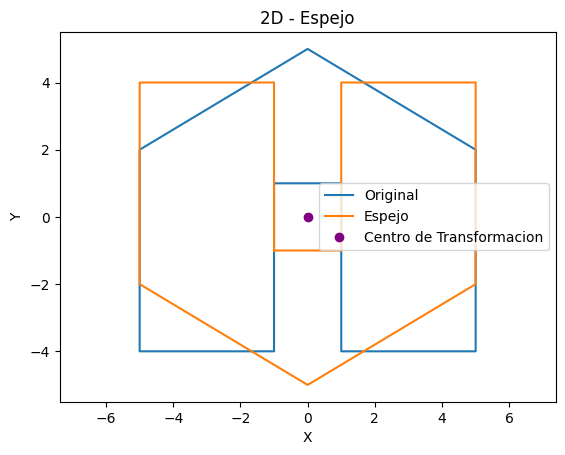

In [66]:
opcion = input("Selecciona la dimensión (1: 2D, 2: 3D): ")
if opcion == '1':
    opcion_2D = input("Selecciona la transformación (1: traslación, 2: rotación, 3: espejo): ")

    if opcion_2D == '1':
        tx = float(input("Ingrese el desplazamiento en el eje X: "))
        ty = float(input("Ingrese el desplazamiento en el eje Y: "))
        puntos_figura_2D = [(-1, 1), (-1, -4), (-5, -4), (-5, 2), (0, 5), (5, 2), (5, -4), (1, -4), (1, 1), (-1, 1)]
        centro_2D = (0, 0)
        puntos_traslados_2D = trasladar_puntos(puntos_figura_2D, tx, ty)
        plot_figura_2D(puntos_figura_2D, puntos_traslados_2D, centro_2D, 'Traslacion')
        
    elif opcion_2D == '2':
        angulo = float(input("Ingrese el ángulo de rotación en grados: "))
        puntos_figura_2D = [(-1, 1), (-1, -4), (-5, -4), (-5, 2), (0, 5), (5, 2), (5, -4), (1, -4), (1, 1), (-1, 1)]
        centro_2D = (0, 0)
        puntos_rotados_2D = [rotacion_2D(punto, angulo, centro_2D) for punto in puntos_figura_2D]
        plot_figura_2D(puntos_figura_2D, puntos_rotados_2D, centro_2D, 'Rotacion')

    elif opcion_2D == '3':
        puntos_figura_2D = [(-1, 1), (-1, -4), (-5, -4), (-5, 2), (0, 5), (5, 2), (5, -4), (1, -4), (1, 1), (-1, 1)]
        puntos_espejo_2D = espejo_2D(puntos_figura_2D)
        centro_2D = (0, 0)
        plot_figura_2D(puntos_figura_2D, puntos_espejo_2D, centro_2D, 'Espejo')

    else:
        print("Opción inválida.")

elif opcion == '2':
    opcion_3D = input("Selecciona la transformación (1: traslación, 2: rotación, 3: espejo): ")

    if opcion_3D == '1':
        tx = float(input("Ingrese el desplazamiento en el eje X: "))
        ty = float(input("Ingrese el desplazamiento en el eje Y: "))
        tz = float(input("Ingrese el desplazamiento en el eje Z: "))

        # Definir los puntos de la casa en 3D
        puntos_figura_3D = [
            (0, 0, 0), (0, 5, 0), (2, 7, 0), (4, 5, 0), (4, 0, 0),  # Base de la casa
            (0, 0, 4), (0, 5, 4), (2, 7, 4), (4, 5, 4), (4, 0, 4),  # Techo de la casa
            (1.5, 2.5, 0), (2.5, 2.5, 0), (2.5, 0.5, 0), (1.5, 0.5, 0),  # Puerta
            (3.5, 3.5, 0), (3.5, 4.5, 0), (3.5, 4.5, 1), (3.5, 3.5, 1),  # Ventana
            (0.5, 3.5, 1), (0.5, 4.5, 1), (0.5, 4.5, 0.5), (0.5, 3.5, 0.5)  # Ventana
        ]

        # Aplicar la traslación a los puntos de la casa en 3D
        puntos_traslados_3D = trasladar_puntos(puntos_figura_3D, tx, ty, tz)

        # Definir el centro de la casa trasladada
        centro_3D = (2 + tx, 2.5 + ty, 2 + tz)

        # Graficar la casa original y su traslación
        plot_figura_3D(puntos_figura_3D, puntos_traslados_3D, centro_3D, 'Traslacion')

    elif opcion_3D == '2':
        angulo = float(input("Ingrese el ángulo de rotación en grados: "))
        puntos_figura_3D = [
            (0, 0, 0), (0, 5, 0), (2, 7, 0), (4, 5, 0), (4, 0, 0), # Base de la casa
            (0, 0, 4), (0, 5, 4), (2, 7, 4), (4, 5, 4), (4, 0, 4), # Techo de la casa
            (1.5, 2.5, 0), (2.5, 2.5, 0), (2.5, 0.5, 0), (1.5, 0.5, 0), # Puerta
            (3.5, 3.5, 0), (3.5, 4.5, 0), (3.5, 4.5, 1), (3.5, 3.5, 1), # Ventana
            (0.5, 3.5, 1), (0.5, 4.5, 1), (0.5, 4.5, 0.5), (0.5, 3.5, 0.5) # Ventana
        ]
        centro_3D = (2, 2.5, 2)
        puntos_rotados_3D = [rotacion_3D(punto, angulo, centro_3D) for punto in puntos_figura_3D]
        plot_figura_3D(puntos_figura_3D, puntos_rotados_3D, centro_3D, 'Rotacion')

    elif opcion_3D == '3':
        puntos_figura_3D = [
            (0, 0, 0), (0, 5, 0), (2, 7, 0), (4, 5, 0), (4, 0, 0), # Base de la casa
            (0, 0, 4), (0, 5, 4), (2, 7, 4), (4, 5, 4), (4, 0, 4), # Techo de la casa
            (1.5, 2.5, 0), (2.5, 2.5, 0), (2.5, 0.5, 0), (1.5, 0.5, 0), # Puerta
            (3.5, 3.5, 0), (3.5, 4.5, 0), (3.5, 4.5, 1), (3.5, 3.5, 1), # Ventana
            (0.5, 3.5, 1), (0.5, 4.5, 1), (0.5, 4.5, 0.5), (0.5, 3.5, 0.5) # Ventana
        ]
        puntos_espejo_3D = espejo_3D(puntos_figura_3D)
        centro_3D = (2, 2.5, 2)
        plot_figura_3D(puntos_figura_3D, puntos_espejo_3D, centro_3D, 'Espejo')

    else:
        print("Opción inválida.")

else:
    print("Opción inválida.")